# 📌 Taller: Análisis de riesgo en cartera de microcréditos

## 📖 Tabla de Contenidos  

#### **1. Business Understanding**
   - 1.1 Overview of the Challenge and Problem Statement ✅
   - 1.2 Objetive - SMART Question ✅
   - 1.3 Literature Review ✅

#### **2. Data Understanding**
   - 2.1 Data Dictionary ✅    
   - 2.2 Data Structure Analysis ✅
   - 2.3 Data cleaning ✅
   - 2.4 Univariate Analysis ✅
   - 2.5 Bivariate Analysis ✅

#### **3. Data Preparation**
   - 3.1 Dataset preprocessing ✅
   - 3.2 Feature Engineering ✅
      - 3.2.1 Data Preprocessing Pipeline  ✅

#### **4. Modeling**
   - 4.1 Logistic Regression - 0.8984  ⚠️
   - 4.2 XGBoost - 0.9225  ⚠️

#### **5. Evaluation & Deployment**
   - 5.1 Final Model Selection, Best Model Performance & Insights ⚠️
   - 5.2 Deployment Strategy  ✅

## Introducción
#### 1.1. Generalidades del reto y problema de interés. 

<p align="justify">
  Este análisis se enmarca en el Reto de Analítica de Datos, Inteligencia Artificial y Machine 
Learning del Banco W, cuyo objetivo es desarrollar un modelo que permita identificar y 
clasificar a los clientes y agencias con alto riesgo financiero en microcréditos. Para ello, se 
aplicarán técnicas de análisis de datos e IA, que permitan mejorar la toma de decisiones en 
la asignación de analistas de auditoría. 
El proceso de auditoría en microcréditos requiere evaluar el riesgo de los créditos otorgados 
en campo, identificando patrones de conducta inusual, fraudes y perfiles de alto riesgo en 
clientes y agencias. En el sector de las microfinanzas, la gestión del riesgo financiero es 
fundamental  para  garantizar  la sostenibilidad de las entidades prestamistas y minimizar 
pérdidas derivadas de incumplimientos crediticios.  
Definición de microcréditos: Son préstamos de pequeña cuantía otorgados a personas de 
bajos  ingresos  o  con  dificultades  de  acceso  a  la  banca  tradicional,  con  el objetivo de 
fomentar el autoempleo y el desarrollo de pequeños negocios.  
 
Características  de  los  microcréditos:  tienen  montos  reducidos,  plazos  de devolución 
cortos,  tasas  de  interés  accesibles  y  una  evaluación del riesgo crediticio basada en la 
capacidad y voluntad de pago del solicitante, en lugar de garantías tangibles. En Colombia, 
un microcrédito no puede exceder los 120 salarios mínimos legales vigentes (SMLV). Este 
tipo de crédito está dirigido a microempresarios y personas independientes
</p>


#### 1.2. Objetivo claro - Pregunta SMART  
<p align="center"><b>¿Cómo podemos desarrollar un modelo basado en análisis de datos e inteligencia 
artificial para identificar créditos, analistas y agencias con alto riesgo financiero en la 
cartera de microcréditos del banco W, utilizando características del crédito, historial 
de auditorías y factores de estabilidad financiera, con el fin de priorizar las auditorías 
internas y mejorar la eficiencia del proceso en un período de seis meses?</b></p>

¿Por qué es SMART? 

- *Específica:* Se especifica que se usará análisis de datos e inteligencia artificial. Se 
centra en créditos, analistas y agencias de alto riesgo, dentro del contexto de 
auditoría de microcréditos. 

- *Medible:* Se establece que el modelo debe identificar casos de alto riesgo y mejorar 
la eficiencia de auditorías. 

- *Alcanzable:* Puede resolverse con análisis exploratorio de datos (EDA modelos de 
IA, y se cuenta con los datos del área de auditoría del banco. 

- *Relevante:* Es clave para mejorar la gestión del riesgo financiero de microcréditos y 
la selección de auditorías internas. 

- *Con límite de tiempo:* Se define un horizonte de seis meses para la 
implementación. Puede abordarse en el plazo del curso.

### 2.1. Data Dictionary - Microcredit Risk Analysis

| **Column Name**        | **Definition** |
|-----------------------|---------------|
| **ID_modif** | Unique identifier for each credit operation, anonymized for data protection. |
| **Credit_Type** | Type of credit granted (e.g., new, renewal, restructured). |
| **Disbursement_Date** | The date when the microcredit was disbursed to the client. |
| **Analyst_Visit** | Indicates whether the microcredit analyst visited the client for an evaluation. |
| **Auditor_Visit** | Indicates whether the auditor visited the client as part of the audit process. |
| **Business_Activity** | The type of economic activity the client engages in (e.g., retail, agriculture). |
| **Loan_Amount** | The total amount of the microcredit granted. |
| **Installment_Amount** | The periodic payment amount the client must pay. |
| **Loan_Term** | Duration of the loan in months. |
| **Portfolio_Rating** | Classification of the credit portfolio based on risk assessment. |
| **Employment_Status** | Indicates if the client has a stable job or business operation. |
| **Agency** | The microcredit agency responsible for issuing and managing the loan. |
| **Geographical_Zone** | The region where the client or agency is located. |
| **Risk_Category** | Classification of the credit’s risk level (e.g., high, medium, low). |
| **Findings** | Identified anomalies or observations in the credit auditing process. |
| **Finding_Type** | Classification of detected irregularities (e.g., fraud, policy breach). |
| **Audit_Classification** | Categorization of the credit based on audit evaluation results. |
| **Credit_Status** | The final state of the credit (e.g., normal, overdue, written-off). |
| **Year** | Year of the credit disbursement or audit analysis. |
| **Risk_Score** | A numerical indicator representing the estimated financial risk of a loan. |




### 2.2. Data Structure Analysis

<p align="justify"> Before selecting the variables, we first present the two main datasets:

1) Audit Findings History: Contains information on audits, evaluated clients, office and placement zones, credit types, credit status, and classifications of findings related to financial stability.

2) Credit Placement Data: Provides details on issued loans, client identifiers, loan amounts, interest rates, repayment terms, and installment values.

The audit history from 2022 to 2024 enables an analysis of trends in detected findings, while the credit placement dataset from October 2024 allows the identification of risks in the most recent loan portfolio.

However, the data presented the following challenges:

A significant number of missing values, which cannot be easily replaced due to their high volume.
A large number of categorical variables, which could be processed using techniques such as One-Hot Encoding or Label Encoding where appropriate.
Multiple ID variables that do not provide direct analytical value, although they could potentially be leveraged to infer client age patterns—older clients may have lower identification numbers, while younger clients might have higher ones.
</p>

### 2.3 Data cleaning 

#### Overall check

Reviewing the columns, we can gather valuable information about the data and the context, in order to know how to develop an EDA and ML project.  
We can also clean the columns data, in order to have valuable information.

--> First, we will do an overral check of the data. We will check the data type of each column, the number of missing values, the number of unique values, and some random data.
This review will give us some advices or guide of which columns to modify/clean.

--> Further check column per column, is done in the notebook `notebooks/data_cleaning.ipynb`

In [ ]:
pd.DataFrame({
    'objetc_type': df_base.dtypes.apply(lambda x: x.name).tolist(),
    'num_unique_values': df_base.nunique().tolist(),
    'num_nan_values': df_base.isna().sum().tolist(),
    'random_data': [df_base[col].sample(5).tolist() for col in df_base.columns]
}, index=df_base.columns)

,objetc_type,num_unique_values,num_nan_values,random_data
Num,int64,3919,0,"[1140, 3867, 3621, 2543, 2881]"
ID_modif,int64,3424,0,"[1151447243, 1098710400, 18417513, 79591442, 6..."
Cliente,object,3459,1,"[Wendys Johana Pacheco De La Rosa, Restrepo Mo..."
Analista,object,406,0,"[KVN, DTG, KAN, JKR, KBZ]"
Nombre analista,object,403,0,"[Rigoberto Figueroa Molina, Jorge Eduardo Her..."
Tipo crédito,object,5,202,"[Preferenci, Nuevo, Nuevo, Nuevo, Preferenci]"
Fecha desem,object,804,3,"[2024-03-30 00:00:00, 2023-06-05 00:00:00, 16/..."
Visita_analista_crédito,object,690,800,"[2022-07-21 00:00:00, 2023-07-05 00:00:00, 202..."
Visita_auditor,object,881,119,"[2023-12-12 00:00:00, 2024-01-18 00:00:00, 202..."
Actividad,object,2364,52,"[venta de leche, confecciones , chatarreria, e..."


#### Data cleaning steps

--> Next, **we will make a list of actions to pre-process and clean up the columns and observations**, in order to get more out of the following analysis and project phases.

--> In addition, **we will be leaving some comments on relevant information and knowledge of the data** from this cleaning and basic review stage.

In [ ]:
# 1. columns like "Num" & "ID_modif" are not relevant for the analysis. so, 
# We will eliminate it.

df = df_base.drop(columns=["Num", "ID_modif"])

In [ ]:
print(f'Number of clients with more than one record: {(df.Cliente.value_counts()>1).sum()}')

Number of clients with more than one record: 229


--> Each observation is a different audit analysis or **audit finding**, even for the same client/account.

**The clients-credit in the dataset should be unique, so we will eliminate the duplicated observations for the same Client-credit combination**. We take in consideration the possibility of a same client to have more than one credit in different moments.

In [ ]:
# 2. drop duplicates to have only one observation per client-credit
df = df.drop_duplicates(subset=["Cliente","Fecha desem", "Monto", "Cuota", "Plazo"]) 

# 3. rename Cliente column to avoid capital letters
df.rename(columns={"Cliente":"cliente"}, inplace=True)

In [ ]:
print(df.Analista.sample(5))
print()
print(df.Analista.apply(lambda x: len(x)).value_counts())

3148    MVQ
1156    EDN
1999    HBM
2485    KNX
1674    KTC
Name: Analista, dtype: object

Analista
3    3461
Name: count, dtype: int64


--> All the analyst codes have 3 letters.

In [ ]:
# 4. Drop the column Nombre analista. This column is not necessary for the analysis.
df = df.drop(columns=["Nombre analista"])

# 5. rename analista column to avoid capital letters
df = df.rename(columns={"Analista": "analista"})

-- > For the column "Tipo de credito" we found some typos, i.e. with the world "Preferencial" and "Renovacion". 
- **We will rename the column name to "tipo_credito"**
- **We will rename the "Preferenci" values as "Preferencial".**
- **We will rename the "Renovación" values as "Renovacion"**
- **We will rename the nan values with "No_especificado"**.


In [ ]:
# 6. rename 'tipo credito' column to avoid capital letters
df = df.rename(columns={"Tipo crédito": "tipo_credito"})

# 7. fill NaN values of tipo_credito column
df["tipo_credito"] = df["tipo_credito"].fillna("No_especificado")

# 8. Correct typos and unify levels
df["tipo_credito"] = np.where(df["tipo_credito"] == "Renovación", "Renovacion", df["tipo_credito"])
df["tipo_credito"] = np.where(df["tipo_credito"] == "Preferenci", "Preferencial", df["tipo_credito"])


---

In [ ]:
df[["Fecha desem","Visita_analista_crédito","Visita_auditor"]].sample(10, random_state=1)

,Fecha desem,Visita_analista_crédito,Visita_auditor
2431,2023-01-06 00:00:00,2023-01-02 00:00:00,2023-02-16 00:00:00
3342,2024-01-31 00:00:00,2024-01-30 00:00:00,2024-03-08 00:00:00
2107,2022-05-16 00:00:00,N/D,2023-08-16 00:00:00
1608,2022-06-13 00:00:00,2022-06-13 00:00:00,2023-01-13 00:00:00
3488,2024-03-27 00:00:00,NaN,2024-05-07 16:30:00
3905,2024-07-10 00:00:00,2024-07-05 00:00:00,2024-08-16 11:37:49.210000
968,31/03/2022,31/03/2022,00:00:00
2308,2023-07-22 00:00:00,2023-07-18 00:00:00,2023-07-28 08:50:00
1881,2023-03-30 00:00:00,2023-03-29 00:00:00,2023-05-09 00:00:00
3364,2024-02-29 00:00:00,2024-02-22 00:00:00,2024-03-13 00:00:00


--> Above we can see at least 6 different formats for the "dates" type columns. This is an unwanted problem.

For further analisys or feature engineering, we will keep the columns "Fecha desem" and "Visita_analista_credito". but in addition, we will do the next steps:

- **We will rename the columns to avoid capital letters and blank spaces.**
- **We will standarize the columns to a date format, avoiding errors and missing values**.
- **We will drop the observations with dates like "00:00:00".**
- **We will eliminate the auditor visit column**, because in an hipotetic modelling phase, we cant know the auditor visit in advance.

In [ ]:
# 9. rename dates columns
df = df.rename(columns={"Visita_analista_crédito": "visita_analista_credito","Fecha desem": "fecha_desembolso"})

# 10. drop observations with auditor visit dates similar to 00:00:00
df = df[(df["Visita_auditor"]!="00:00:00") & (df["Visita_auditor"]!=datetime.time(0, 0))]

# Define a function to handle different dates formats
def convert_to_datetime(value):
    if pd.isna(value) or value in ["N/D", "NAN"]:  # Handle missing or invalid values
        return pd.NaT
    try:
        return pd.to_datetime(value, dayfirst=True, errors='coerce')  # Convert to datetime and handle errors
    except:
        return pd.NaT  # Return NaT if it fails

# 11. Apply function to handle different dates formats to both columns
df["fecha_desembolso"] = df["fecha_desembolso"].apply(convert_to_datetime)
df["visita_analista_credito"] = df["visita_analista_credito"].apply(convert_to_datetime)

# 12. Drop column auditor visit
df = df.drop(columns=["Visita_auditor"])

---

Now, about the "Actividad" column:

--> We can see a lot of different activities, but also we can see that there are some values that are referring to the same, for example "Tienda" and "tienda".

--> Several activities have typos and errors. This could difficult the analysis or next phases.

The activity variable could be very important for any EDA or modelling, but it has a lot of values, errors and should be very difficult to fix.  
Despite that, we will try to fix the Activity column in order to gather some information in next steps:  

- **We will rename the variable column.**
- **We will run some fixes and considerations to the Activity column**.
- **and we will create a new activity_v2 column to not drop the original one.**

In [ ]:
# Function to clean Activity values
def clean_occupation(value):
    if pd.isna(value):  # Handle missing values
        return "no_especificado"
    value = value.strip()  # Remove spaces at the beginning and end
    value = unidecode(value)  # Remove accents
    value = value.lower()  # Convert to lowercase
    value = value.replace(" ", "_")  # Replace spaces with underscores
    return value

# 13. Clean activity values
df["Actividad"] = df["Actividad"].apply(clean_occupation)

# 14. rename column Actividad to avoid capital letters
df = df.rename(columns={"Actividad": "actividad"})

In [ ]:
### 15. Function to combine some Activity values to create macro-activities

def combine_occupation(value):
    if any(char in value for char in ["no_especificado"]):
        return "no_especificado"
    if any(char in value for char in ["ambulant"]):
        return "comercio_ambulante"
    elif any(
        char in value
        for char in [
            "agrico",
            "agricultura",
            "agro",
            "agricultor",
            "culti",
            "ganad",
            "cerdo",
            "pollo",
            "vaca",
            "animal",
            "cr?",
            "cria",
            "platano",
            "banano",
        ]
    ):
        return "agricultura_ganaderia_y_afines"
    elif any(
        char in value
        for char in [
            "comida",
            "restau",
            "alimen",
            "condimento",
            "cafe",
            "caf?",
            "frit",
            "plato",
            "frut",
            "fruv",
            "pan",
            "helad",
            "arepa",
            "empana",
            "piz",
            "leche",
            "almuerz",
            "carnic",
            "salsa",
            "lacte",
        ]
    ):
        return "sector_alimenticio"
    elif any(char in value for char in ["arriendo", "arren", "inmobi", "alquil"]):
        return "arriendos_alquiler_e_inmobiliarios"
    elif any(char in value for char in ["obra", "const", "interior","acabado"]):
        return "construccion_obras_y_afines"
    elif any(
        char in value for char in ["confec", "modist", "sastr", "costur", "prenda"]
    ):
        return "confeccion_y_afines"
    elif any(char in value for char in ["miscel","papel","boutique","floriste","flores","detall","sorpre","perfum","artesani","variedades"]):
        return "comercios_varios_y_detallistas"
    elif any(
        char in value for char in ["venta", "vta", "comercio", "mercanc", "comerci"]
    ):
        return "comercio_y_ventas_general"
    elif any(char in value for char in ["tienda", "almac", "supermer", "abarro","mercado_","ferret"]):
        return "tiendas_almacenes_y_ferreterias"
    elif any(
        char in value
        for char in [
            "mecan",
            "autom",
            "metal",
            "tecnico",
            "t?cni",
            "fabricac",
            "electri",
            "soldad",
            "pint",
            "laton",
            "taller",
            "manteni",
            "reparaci",
            "arregl",
            "ebanist",
            "herr",
            "plome",
            "artesan",
            "mueble",
            "manualida",
            "fundici",
            "guada",
            "llant",
            "vulcaniz",
        ]
    ):
        return "oficios_tecnicos_y_manuales"
    elif any(
        char in value for char in ["parquead", "parki", "lavade", "carwash"]
    ):
        return "lavaderos_parqueaderos_y_afines"
    elif any(
        char in value for char in ["transp", "trasp", "taxi", "bus", "vehicu", "moto","carga"]
    ):
        return "transporte_vehiculos_y_afines"
    elif any(
        char in value
        for char in [
            "manicur",
            "peluq",
            "bell",
            "unas",
            "u?as",
            "nail",
            "spa",
            "pein",
            "estili",
            "maquill",
            "barber",
            "masaj",
            "depil",
            "esteti",
            "cosmet",
        ]
    ):
        return "belleza_y_estetica"
    elif any(
        char in value for char in ["enferm", "medic", "salud", "drog", "farm", "hospi","dental","odonto"]
    ):
        return "salud_y_afines"
    elif any(
        char in value
        for char in ["educ", "escol", "refuer", "univ", "coleg", "clase", "docen"]
    ):
        return "servicios_educativos"
    elif any(char in value for char in ["aseo", "limpieza", "aseador"]):
        return "servicios_de_limpieza"
    else:
        return "otros_servicios_y_negocios"


df["actividad_v2"] = df["actividad"].apply(combine_occupation)

---

In [ ]:
print(df[(df["Cuota"]==0) | (df["Plazo"]==0) | (df["Monto"]==0)].shape)
print()
print(df[["Monto","Cuota","Plazo"]].iloc[0:3])

(12, 25)

       Monto    Cuota  Plazo
0  15069.268  792.642     36
1    402.000  209.228    626
3  19213.296  991.582     42


Following, about the columns Monto, Cuota & Plazo:

--> We note that the "Cuota" variable is an object, also there isnt nan values. We also note that there are some observations with zero.  
--> We note that the values of Monto & Cuota are divided by 1000

The cleaning steps will be:  

- We will modify the column names to avoid capital letters.
- **We will cast the Cuota column to float.** To do this, it is necessary to "clean" this column before cast it.
- **We will multiply the Monto & Cuota by 1000.**
- **We will drop the observations with a zero value in any of the three columns.**

In [ ]:
# 16. rename Monto, Cuota & Plazo columns
df = df.rename(columns={"Monto": "monto", "Cuota": "cuota", "Plazo": "plazo"})

# 17. eliminate characters that are not numbers in Cuota
df["cuota"] = df["cuota"].astype(str).str.replace(r'[^0-9.]', '', regex=True)

# 18. turn empty strings into 0 in cuota column
df["cuota"] = np.where(df["cuota"] == "", "0", df["cuota"])

# 19. convert to float the column cuota
df["cuota"] = pd.to_numeric(df["cuota"], errors='coerce')

# 20. multiply by 1000 the cuota & monto columns to convert to thousands
df["cuota"] = round(df["cuota"] * 1000)
df["monto"] = round(df["monto"] * 1000)

# 21. drop the observations with a zero value in any of the three columns.
df = df[(df["cuota"] != 0) & (df["plazo"] != 0) & (df["monto"] != 0)]

---

In [ ]:
df[["Categoria","Hallazgo","Tipo hallazgo", "Riesgo"]].sample(5,random_state=2)

,Categoria,Hallazgo,Tipo hallazgo,Riesgo
898,ESTABILIDAD,Negocio en sociedad,Incumple P & P,2 - Medio
2137,Flujo_de_Caja,Otros ingresos inexistentes,Acto Irregular,2 - Medio
1158,OTRAS_POLITICAS,Formato de vinculación con campos en blanco y/...,Incumple P & P,2 - Medio
2495,Otras_Políticas,Formato de vinculación con campos en blanco y/...,Incumple\n P & P,2 - Medio
1009,FRAUDE_Y_PRÁCTICAS_INDEBIDAS,Alerta de Irregularidades,Acto Irregular,1 - Alto


--> We can see that each column have different strings formats, for example, capital letters, blank spaces, patterns like "\n", etc.  
We find some values that are referred to the same but are wroten different.

--> About the "Hallazgo" column, this is a description of the findings, it is like a comment column. Therefore, it is not necessary to modify it. We could even ignore this column.


In [ ]:
df[df["Riesgo"]=="No aplica"]["Categoria"].value_counts()

Categoria
LIMITACIÓN_EN_EL_ALCANCE    65
Sin_Hallazgo                53
Name: count, dtype: int64

In [ ]:
df[df["Categoria"]=="Sin_Hallazgo"]["Riesgo"].value_counts()

Riesgo
4 - Otro     939
No aplica     53
Name: count, dtype: int64

--> The "Riesgo" column is the cleanest one. It doesnt need cleaning steps.

Checking the "No aplica" level of the column "Riesgo", this level have values without findings or with limitations to complete the audit.

To clean this columns:

- We will drop the few NA values for each column
- **We will avoid capital letters and drop some patterns.**
- **We will rename some values of 'Categoria' & 'Tipo hallazgo' columns in order to unify levels.**
- We will rename the columns to avoid capital letters.
- **We will drop the observations with "Tipo hallazgo" equal to "Limitacion"**.
- Due to the previous step (#5), we will rename the level "No aplica" of the "Riesgo" column to "4 - otro"

In [ ]:
# 22. Drop nan values of the 4 columns (Categoria","Hallazgo","Tipo hallazgo", "Riesgo)
df = df.dropna(subset=["Categoria","Hallazgo","Tipo hallazgo", "Riesgo"])

# Function to clean the column values
def clean_string_column(value):
    if pd.isna(value):  # Handle missing values
        return "no_especificado"
    value = value.strip()  # Remove spaces at the beginning and end
    value = unidecode(value)  # Remove accents
    value = value.lower()  # Convert to lowercase
    return value

# 23. Apply function to clean the column values
df["Categoria"] = df["Categoria"].apply(clean_string_column)
df["Hallazgo"] = df["Hallazgo"].apply(clean_string_column)
df["Tipo hallazgo"] = df["Tipo hallazgo"].apply(clean_string_column)

# 24. Combine some finding types values due to typos (incumple p&p)
df["Tipo hallazgo"] = df["Tipo hallazgo"].apply(lambda x: "incumple_p&p" if "incumple" in x else x)

# 25. rename columns 
df = df.rename(
    columns={
        "Tipo hallazgo": "tipo_hallazgo",
        "Riesgo": "riesgo",
        "Categoria": "categoria",
        "Hallazgo": "hallazgo",
    }
)

# 26. drop observations with limitations (audit incomplete)
df=df[df["tipo_hallazgo"]!="limitacion"]

# 27- Rename values "No aplica" of column Riesgo
df["riesgo"] = df["riesgo"].str.replace("No aplica","4 - Otro")

---

--> The columns "Calificacion cartera" & "Relaciones laborales" have few typos and Nan values

To clean this columns: 

- Rename columns to avoid ccapital letters
- We will change NA values to "no_especificado"
- fix typos in Calificación cartera

In [ ]:
# 28. rename columns " Calificacion cartera" & "Relaciones laborales"
df.rename(columns={"Calificación cartera": "calificacion_cartera", "Relaciones Laborales": "relaciones_laborales"}, inplace=True)

# 29. Turn NaN values of both columns to "no_especificado"
df["calificacion_cartera"] = df["calificacion_cartera"].fillna("no_especificado")
df["relaciones_laborales"] = df["relaciones_laborales"].fillna("no_especificado")

# 30. fix typos
df["calificacion_cartera"] = df["calificacion_cartera"].apply(lambda x: "Si" if "si" in x else x)

---

In [ ]:
# 31. Rename column Oficina
df = df.rename(columns={"Oficina ": "oficina"})

# 32. avoid capital letters and blank spaces of column Oficina
df["oficina"] = df["oficina"].apply(lambda x: x.strip().lower().replace(" ","_"))

# 33. change column names for zona & regional
df = df.rename(columns={"zona ": "zona", "Regional": "regional"})



---

In [ ]:
temp = df["Validación unico"].value_counts()
print(f"\n'validacion unico' top: {temp}")


'validacion unico' top: Validación unico
ok          184
repetido     28
Name: count, dtype: int64


In [ ]:
# 34. drop observations with "repetido" value on column "validacion unico" and drop column
df = df[df["Validación unico"] != "repetido"]
df = df.drop(columns=["Validación unico"])

---

--> The column "Tipo analisis" have a lot of NA values and is no clear how this information could add value to our next steps. 

- We will drop this column due to the lack of valuable information

In [ ]:
# 35. drop column Tipo analisis
df = df.drop(columns=["Tipo analisis "])

--> The column "Clasificac analisis" have a lot of NA values and is no clear how this information could add value to our next steps. 

- We will drop this column due to the lack of valuable information

In [ ]:
# 36. drop column Tipo analisis
df = df.drop(columns=["Clasificac analisis"])

--> The column "Estado" seems to have valuable information about the credit status. Doesnt have typos but several NA values.

In order to clean this column:

- We will rename the column to avoid capital letters.
- We will fill NA values with "no_especificado".
- We will clean a little more the column to avoid capital letters nor blank spaces at the beginning or the last of the string.

In [ ]:
# 37. rename column Estado
df = df.rename(columns={"Estado": "estado"})

# 38. fill NaN values in column estado with no_especificado
df["estado"] = df["estado"].fillna("no_especificado")

# 39. From column estado, eliminate capital letters and blank spaces
df["estado"] = df["estado"].apply(lambda x: x.strip().lower())

In [ ]:
# 40. rename the column year
df = df.rename(columns={"Año": "year"})

# 41. drop the column tipo
df = df.drop(columns=["Tipo"])

#### Create new variables

**The variables that we will create below are intended to improve the exploratory analyses and provide more information about the understanding of the case.**

##### New Credit risk variables 

**objective variable**

In [ ]:
# 42. Create new column "riesgo", labeling the values to numbers (integers)

df["riesgo_int"] = df["riesgo"].replace({
    "1 - Alto": 1,
    "2 - Medio": 2,
    "3 - Bajo": 3,
    "4 - Otro": 4
})

# 43. Create new binomial "riesgo"
df["riesgo_bin"] = df["riesgo"].replace({
    "1 - Alto": 1,
    "2 - Medio": 1,
    "3 - Bajo": 1,
    "4 - Otro": 0
})

print(f'Label encoding "riesgo":\n{df["riesgo_int"].value_counts()}')
print("--")
print(f'Binomial encodign "riesgo":\n{df["riesgo_bin"].value_counts()}')

Label encoding "riesgo":
riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64
--
Binomial encodign "riesgo":
riesgo_bin
1    1832
0    1084
Name: count, dtype: int64


C:\Users\jhona\AppData\Local\Temp\ipykernel_30992\1207113423.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["riesgo_int"] = df["riesgo"].replace({
C:\Users\jhona\AppData\Local\Temp\ipykernel_30992\1207113423.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["riesgo_bin"] = df["riesgo"].replace({


##### New occupation variable

In [ ]:
# 44. combine some Activity values to create macro-activities

def combine_occupation(value):
    if any(char in value for char in ["no_especificado"]):
        return "no_especificado"
    if any(char in value for char in ["ambulant"]):
        return "comercio_ambulante"
    elif any(
        char in value
        for char in [
            "agrico",
            "agricultura",
            "agro",
            "agricultor",
            "culti",
            "ganad",
            "cerdo",
            "pollo",
            "vaca",
            "animal",
            "cr?",
            "cria",
            "platano",
            "banano",
        ]
    ):
        return "agricultura_ganaderia_y_afines"
    elif any(
        char in value
        for char in [
            "comida",
            "restau",
            "alimen",
            "condimento",
            "cafe",
            "caf?",
            "frit",
            "plato",
            "frut",
            "fruv",
            "pan",
            "helad",
            "arepa",
            "empana",
            "piz",
            "leche",
            "almuerz",
            "carnic",
            "salsa",
            "lacte",
        ]
    ):
        return "sector_alimenticio"
    elif any(char in value for char in ["arriendo", "arren", "inmobi", "alquil"]):
        return "arriendos_alquiler_e_inmobiliarios"
    elif any(char in value for char in ["obra", "const", "interior","acabado"]):
        return "construccion_obras_y_afines"
    elif any(
        char in value for char in ["confec", "modist", "sastr", "costur", "prenda"]
    ):
        return "confeccion_y_afines"
    elif any(char in value for char in ["miscel","papel","boutique","floriste","flores","detall","sorpre","perfum","artesani","variedades"]):
        return "comercios_varios_y_detallistas"
    elif any(
        char in value for char in ["venta", "vta", "comercio", "mercanc", "comerci"]
    ):
        return "comercio_y_ventas_general"
    elif any(char in value for char in ["tienda", "almac", "supermer", "abarro","mercado_","ferret"]):
        return "tiendas_almacenes_y_ferreterias"
    elif any(
        char in value
        for char in [
            "mecan",
            "autom",
            "metal",
            "tecnico",
            "t?cni",
            "fabricac",
            "electri",
            "soldad",
            "pint",
            "laton",
            "taller",
            "manteni",
            "reparaci",
            "arregl",
            "ebanist",
            "herr",
            "plome",
            "artesan",
            "mueble",
            "manualida",
            "fundici",
            "guada",
            "llant",
            "vulcaniz",
        ]
    ):
        return "oficios_tecnicos_y_manuales"
    elif any(
        char in value for char in ["parquead", "parki", "lavade", "carwash"]
    ):
        return "lavaderos_parqueaderos_y_afines"
    elif any(
        char in value for char in ["transp", "trasp", "taxi", "bus", "vehicu", "moto","carga"]
    ):
        return "transporte_vehiculos_y_afines"
    elif any(
        char in value
        for char in [
            "manicur",
            "peluq",
            "bell",
            "unas",
            "u?as",
            "nail",
            "spa",
            "pein",
            "estili",
            "maquill",
            "barber",
            "masaj",
            "depil",
            "esteti",
            "cosmet",
        ]
    ):
        return "belleza_y_estetica"
    elif any(
        char in value for char in ["enferm", "medic", "salud", "drog", "farm", "hospi","dental","odonto"]
    ):
        return "salud_y_afines"
    elif any(
        char in value
        for char in ["educ", "escol", "refuer", "univ", "coleg", "clase", "docen"]
    ):
        return "servicios_educativos"
    elif any(char in value for char in ["aseo", "limpieza", "aseador"]):
        return "servicios_de_limpieza"
    else:
        return "otros_servicios_y_negocios"


df["actividad_v2"] = df["actividad"].apply(combine_occupation)

# To check all the activities that have "venta" or "vta" or "comercio" or "mercancia" or "comerci" in the name
# pd.Series([x for x in df["actividad"] if any(char in x for char in ["venta", "vta", "comercio","mercancia","comerci"])]).unique()

In [ ]:
# 45. re order the columns of the df
df = df[["cliente", "analista", "tipo_credito", "actividad", "actividad_v2", "monto", "cuota", "plazo", "oficina", "zona", "regional", "fecha_desembolso", "visita_analista_credito",
         "calificacion_cartera", "relaciones_laborales", "estado", "year",
       "categoria", "hallazgo", "tipo_hallazgo", "riesgo","riesgo_int","riesgo_bin"]]

In [ ]:
df.sample(5)

,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,zona,regional,fecha_desembolso,visita_analista_credito,calificacion_cartera,relaciones_laborales,estado,year,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
389,Josefina Bedoya Mejia,MRC,Nuevo,tienda_josefina,tiendas_almacenes_y_ferreterias,1080000.0,121226.0,12,pereira_lagos,12,4,2022-06-29,2022-06-28,No,no_especificado,cancelada,2022,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0
2195,Ana Maria Morales Martinez,KSC,Renovacion,corredor_de_seguros,otros_servicios_y_negocios,6562050.0,680923.0,18,zipaquira,6,3,2022-12-28,2022-12-28,No,No,modificado,2023,calidad_de_datos,informacion errada en datos basicos,fallas en la metodologia,3 - Bajo,3,1
1981,Leidy Johana Vega Cortes,HBM,Nuevo,venta_por_catalogo,comercio_y_ventas_general,5625976.0,379736.0,24,chaparral,11,4,2023-06-07,2023-06-06,No,No,normal,2023,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0
1240,Javier Ramirez Zuniga,HZU,Nuevo,servicio_tecnico_gas_domiciliario,oficios_tecnicos_y_manuales,5634062.0,343157.0,33,laureano_gómez,2,1,2022-06-18,2022-06-16,No,no_especificado,cancelada,2022,otras_politicas,formato de vinculacion con campos en blanco y/...,incumple_p&p,2 - Medio,2,1
307,Martha Cecilia Garcia Medina,IOC,Renovacion,venta_de_pollo,agricultura_ganaderia_y_afines,5427250.0,339964.0,30,dosquebradas,12,4,2022-05-18,NaT,No,No,normal,2022,sin_hallazgo,sin hallazgo,sin hallazgo,4 - Otro,4,0


### 2.4. Univariate Analysis

##### **Variable Selection: Mount**

<p align="justify"> Next, we will do some data explorations to the "Mount" variable, in order to gather valuable information that allow us to focus better the goal or solution.

To address the challenge from a **univariate analysis perspective**, several variables were considered as potential indicators of financial risk in microcredits, including:
Credit Type: Differentiates between new and renewal credits.
Credit Status: Classification based on its current state (canceled, charged-off, modified, etc.).
Outstanding Balance: Reflects the remaining debt, indicating financial exposure.
Loan Amount: The total credit granted.
Interest Rate: Represents the financial cost and risk profile of the borrower.
Loan Term: Short, medium, or long-term classification based on duration.
Office Location: Potential relationship between risk and agency distance from capital cities.
Audit Findings History: Records clients or agencies previously flagged as risky.
Client’s Economic Activity: Identifies industries with higher or lower default probability.
However, the selection of the variable "Loan Amount" (Monto) is justified based on the following key criteria:

1) Financial Exposure Indicator
Larger loans imply higher financial commitments, increasing the risk of default. Studies have shown that higher loan amounts tend to correlate with greater financial strain on borrowers, leading to increased default probabilities.

2) Key Credit Risk Factor
The loan amount is one of the most relevant variables in credit risk analysis, as it directly impacts default probability and portfolio stability (Berisha et al., 2023).

3) Anomaly and Fraud Detection
Outlier values in loan amounts can signal financial instability or potential irregularities, which may indicate fraudulent activities or mismanagement.

4) Empirical Support from Previous Research
-  Schreiner (2000): Identifies loan amount as a determinant factor in credit risk assessment.
-  Moposita & Ramírez (2016): Highlight loan amount as a key indicator in financial audits, enabling risk-based client segmentation. Univariate analysis techniques (e.g., histograms, boxplots) facilitate outlier detection and identification of default patterns.
-  Hernández Bautista (2023): Demonstrates that analyzing loan amounts alongside other financial metrics enhances risk segmentation. His findings show that the relationship between loan amount and payment behavior is a key factor in portfolio audits.

5) Suitability for Advanced Analyses
The Benford’s Law is applicable to naturally occurring numerical variables such as loan amounts, making it a useful tool for detecting data manipulations and inconsistencies.

6) Risk-Based Customer Segmentation
The distribution of loan amounts can reveal risk patterns, aiding in the identification of high-risk customers and optimizing internal audit processes.

</p>

In [ ]:
print(f'Number of observations: {df_clean.shape[0]}')
print(f'Number of NA values: {df_clean.monto.isna().sum()}')

Number of observations: 2916
Number of NA values: 0


##### Distribution

First, lets check the general distribution of the variable monto

In [ ]:
print("¡lets calculate some important metrics!\n")
print("\n--Central tendency:")
print(f'Mean: ${round(df_clean.monto.mean(),1):,}')
print(f'Median: ${round(df_clean.monto.quantile(0.5),1):,}')
print(f'Mode: ${round(df_clean.monto.mode()[0],1):,}')
print(f'Min: ${round(df_clean.monto.min(),1):,}')
print(f'Max: ${round(df_clean.monto.max(),1):,}')

print("\n--Measures of dispersion:")
print(f'standard deviation: ${round(df_clean.monto.std(),1):,}')
print(f"Variation coefficient: {round(df_clean['monto'].std() / df_clean['monto'].mean() * 100,1)}")
print(f"Range: ${round(df_clean['monto'].max() - df_clean['monto'].min(),1):,} ")
print(f"IQR: ${round(df_clean['monto'].quantile(0.75) - df_clean['monto'].quantile(0.25),1):,} ")

print("\n--Measures of distribution shape:")
print(f"Skewness: {round(df_clean['monto'].skew(),1)}")
print(f"Kurtosis: {round(df_clean['monto'].kurtosis(),1)}")

print("\n--Some percentiles:")
percentiles = [0.1, 0.25, 0.5, 0.75, 0.9]
values= df_clean['monto'].quantile(percentiles).to_list()
print([f"P{int(p*100)}: ${int(v):,}" for p, v in zip(percentiles, values)])

¡lets calculate some important metrics!


--Central tendency:
Mean: $8,032,992.9
Median: $3,751,294.0
Mode: $400,000
Min: $400,000
Max: $115,832,618

--Measures of dispersion:
standard deviation: $12,178,405.0
Variation coefficient: 151.6
Range: $115,432,618 
IQR: $5,766,664.5 

--Measures of distribution shape:
Skewness: 3.5
Kurtosis: 16.2

--Some percentiles:
['P10: $1,088,578', 'P25: $1,833,451', 'P50: $3,751,294', 'P75: $7,600,116', 'P90: $20,077,732']


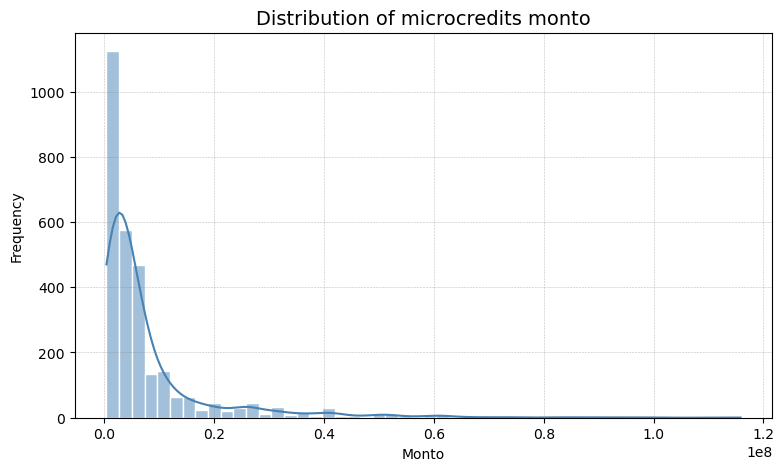

In [ ]:
# histogram
plt.figure(figsize=(9, 5))
sns.histplot(x=df_clean.monto, edgecolor="white", color="steelblue", linewidth=1, bins=50, kde=True)
plt.title('Distribution of microcredits monto', fontsize=14)
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

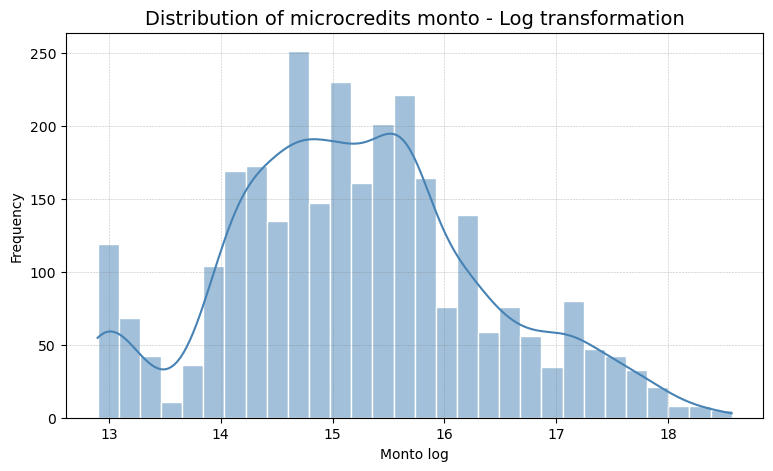

In [ ]:
# histogram with logarithmic transformation
plt.figure(figsize=(9, 5))
sns.histplot(x=np.log(df_clean.monto), edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title('Distribution of microcredits monto - Log transformation', fontsize=14)
plt.xlabel("Monto log")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
plt.show()

##### Check outliers

In [ ]:
print("Lets calculate some outliers metrics:\n")

# Q1, Q3 & IQR
Q1 = np.percentile(df_clean.monto, 25)  # Q1 (25%)
Q3 = np.percentile(df_clean.monto, 75)  # Q3 (75%)
IQR = Q3 - Q1  # IQR

# Limits for outliers
lower_limit = Q1 - 1.5 * IQR 
lower_limit = 0 if lower_limit<0 else lower_limit
upper_limit = Q3 + 1.5 * IQR

# Identify outlier
outliers = df_clean.monto[(df_clean.monto < lower_limit) | (df_clean.monto > upper_limit)]
upper_outliers = df_clean[(df_clean.monto > upper_limit)]

print(f'Outliers upper limit: ${upper_limit:,}')
print(f'Outliers lower limit: ${lower_limit:,}')

print(f'Number of microcredits consider as outliers: {upper_outliers.shape[0]}')
print(f'% of outliers of the total observations: {round(upper_outliers.shape[0]/df_clean.shape[0]*100,2)}%')


Lets calculate some outliers metrics:

Outliers upper limit: $16,250,112.75
Outliers lower limit: $0
Number of microcredits consider as outliers: 355
% of outliers of the total observations: 12.17%


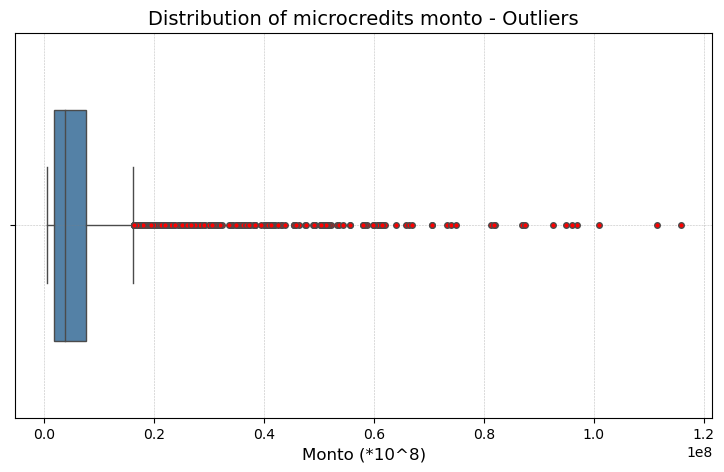

In [ ]:
# Boxplot

plt.figure(figsize=(9, 5))
sns.boxplot(x=df_clean['monto'], color="steelblue", linewidth=1, width=0.6, 
            flierprops=dict(marker='o', markerfacecolor='red', markersize=4))

plt.title("Distribution of microcredits monto - Outliers", fontsize=14)
plt.xlabel("Monto (*10^8)", fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.show()

##### Other analysis and patterns

In [ ]:
print("The most frequently requested loans are:")
df_clean.monto.value_counts()[0:10]

The most frequently requested loans are:


400000     113
500000      68
1000000     32
600000      30
1500000     29
1631982     21
2345852     13
700000      11
800000      11
8000000      9
Name: monto, dtype: int64

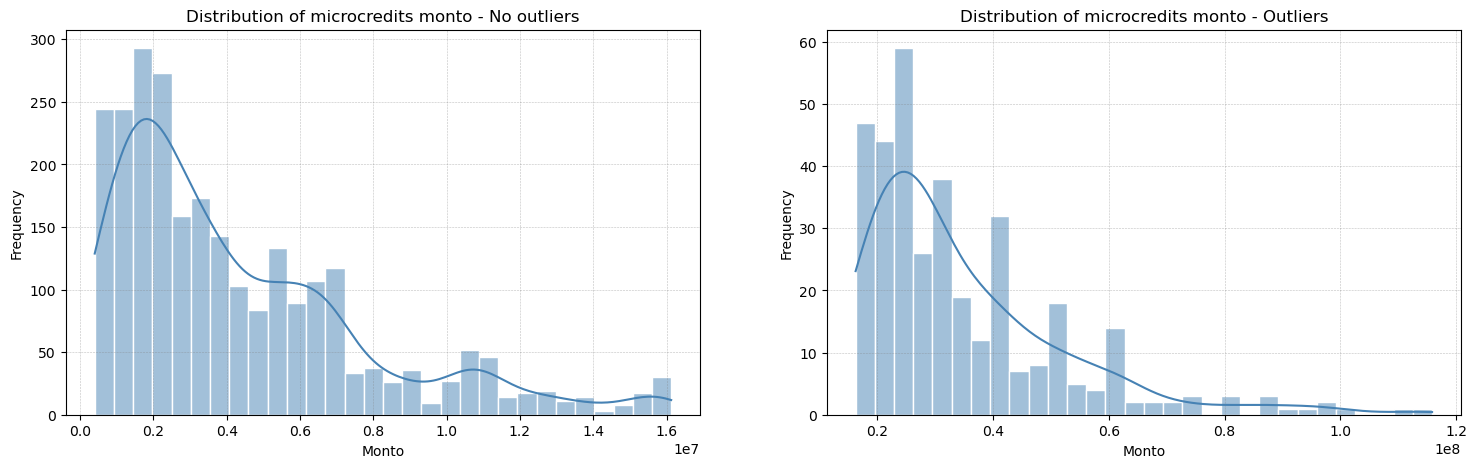

In [ ]:
# lets check the distribution of monto spliting the outliers observations

plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
sns.histplot(x = df_clean[df_clean.monto<upper_limit].monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - No outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)

plt.subplot(1,2,2)
sns.histplot(x = upper_outliers.monto, edgecolor="white", color="steelblue", linewidth=1, bins=30, kde=True)
plt.title("Distribution of microcredits monto - Outliers")
plt.xlabel("Monto")
plt.ylabel("Frequency")
plt.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)


plt.show()


## 2.5 Bivariate Analysis

**Objective**
- Identify patterns in each variables
- Evaluate whether certain analysts systematically approve riskier loans.
- Provide insights that may help optimize risk assessment and decision-making processes.

**Analysis Approach**
1. **Data Loading & Exploration**: Load and inspect the dataset to understand its structure.
2. **Descriptive Statistics**: Summarize key statistics for each variable level.
3. **Data Visualization**:
   - **Bar charts** to compare averages.
   - **Boxplots** to visualize distributions.
   - **Contingency tables & Chi-square test** to determine statistical relationships.
4. **Interpretation & Conclusions**: Identify key findings and actionable insights.


### **Analista vs Riesgo**



In [ ]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
#Load data

df = pd.read_excel("G:\\Mi unidad\\Maestría Inteligencia Artificial Aplicada\\1. Primer semestre\\1. Análisis de datos I\\Reto Banco W\\Analitica_1\\Data\\output_data\\hallazgos_clean.xlsx")
df.head(20)



,Unnamed: 0,cliente,analista,tipo_credito,actividad,actividad_v2,monto,cuota,plazo,oficina,...,relaciones_laborales,estado,year,tipo,categoria,hallazgo,tipo_hallazgo,riesgo,riesgo_int,riesgo_bin
0,0,Hector Julio Pabon Castano,AIZ,Renovacion,don_patacon_postobon,otros_servicios_y_negocios,15069268,792642,36,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
1,1,Casas Marisol ...,JQQ,Renovacion,expendio_de_comidas_preparadas_en_cafeterias,sector_alimenticio,402000,209228,626,poblado,...,Si,castigo,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
2,2,Jennifer Lopez Perez,IOC,Nuevo,drogueria,salud_y_afines,19213296,991582,42,dosquebradas,...,Si,modificado,2022,afecta estabilidad,fraude_y_practicas_indebidas,negocio no es del solicitante,acto irregular,1 - Alto,1,1
3,3,Laura Marcela Valdes Zapata,CZL,Renovacion,manualidades_artes_plasticas,oficios_tecnicos_y_manuales,1055378,205648,6,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
4,4,Martha Cecilia Veru,AQT,Preferencial,venta_de_mercancia,comercio_y_ventas_general,2481136,170529,24,independencia,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
5,5,Alba Nory Ospina Quintero,EQJ,Preferencial,mercancia,comercio_y_ventas_general,30933408,1358673,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
6,6,Carmelita Arias De Diaz,IKO,Preferencial,venta_de_catalogos,comercio_y_ventas_general,2100000,167706,24,dosquebradas,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1
7,7,Liana Shirley Zapata Maya,CZL,Renovacion,clases_de_pintura_manualidades,oficios_tecnicos_y_manuales,400000,84084,8,tulua,...,no_especificado,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
8,8,Angela Patricia Pabon Castano,IKO,Renovacion,don_patacon,otros_servicios_y_negocios,31031562,1228002,42,dosquebradas,...,Si,normal,2022,afecta estabilidad,fraude_y_practicas_indebidas,credito otorgado a mas de un titular con el mi...,acto irregular,1 - Alto,1,1
9,9,Flor Alba Nunez Tagua,MAP,Renovacion,manualidades,oficios_tecnicos_y_manuales,3308000,431000,15,independencia,...,Si,cancelada,2022,afecta estabilidad,fraude_y_practicas_indebidas,presunto negocio inexistente,acto irregular,1 - Alto,1,1


In [ ]:
# Revisión de los datos

# Verificar si hay valores nulos en las columnas de interés
print(df[['analista', 'riesgo_int']].isnull().sum())

# Contar cuántos analistas distintos hay en la base de datos
print(f"Número de analistas distintos: {df['analista'].nunique()}")

# Ver la distribución de los niveles de riesgo
print(df['riesgo_int'].value_counts())



analista      0
riesgo_int    0
dtype: int64
Número de analistas distintos: 386
riesgo_int
4    1084
2    1084
3     423
1     325
Name: count, dtype: int64


¿Existen analistas que consistentemente aprueban más créditos de riesgo alto que los demás?

In [ ]:
# Crear una tabla de contingencia de analistas vs. niveles de riesgo
tabla_riesgo_por_analista = pd.crosstab(df['analista'], df['riesgo_int'])

# Mostrar la tabla generada
print(tabla_riesgo_por_analista)


riesgo_int  1  2  3   4
analista               
ACX         0  4  4   1
ADR         0  0  0   7
AIL         0  0  1  10
AIZ         2  0  0   1
AJI         0  1  0   1
...        .. .. ..  ..
SON         0  1  0  14
WBZ         0  4  0   0
YMG         2  1  1   7
YPN         2  2  0  16
ZUL         0  0  5   2

[386 rows x 4 columns]


In [ ]:
# Crear una nueva columna en la tabla con la suma de los otros niveles de riesgo (2, 3, 4)
tabla_riesgo_por_analista['Total_Otros_Riesgos'] = tabla_riesgo_por_analista[2] + tabla_riesgo_por_analista[3] + tabla_riesgo_por_analista[4]

# Filtrar los analistas que aprueban más créditos de riesgo alto (1) que los otros niveles combinados
analistas_riesgo_alto = tabla_riesgo_por_analista[tabla_riesgo_por_analista[1] > tabla_riesgo_por_analista['Total_Otros_Riesgos']]

# Mostrar los analistas que cumplen la condición
print("Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:")
print(analistas_riesgo_alto)


Analistas que aprueban más créditos de riesgo alto que la suma de los demás niveles:
riesgo_int   1  2  3  4  Total_Otros_Riesgos
analista                                    
AIZ          2  0  0  1                    1
CJN          6  2  0  3                    5
EDN          2  0  0  0                    0
FFW          4  0  0  0                    0
FYJ          1  0  0  0                    0
IQB          2  1  0  0                    1
ISV          3  0  0  2                    2
ISY          3  0  0  1                    1
IZS          1  0  0  0                    0
JKR         13  0  0  7                    7
KLR          2  0  0  0                    0
KVN          8  1  0  2                    3
LQL          2  0  0  1                    1
LRG          3  0  0  2                    2
MFQ          6  0  0  1                    1


<Figure size 1200x600 with 0 Axes>

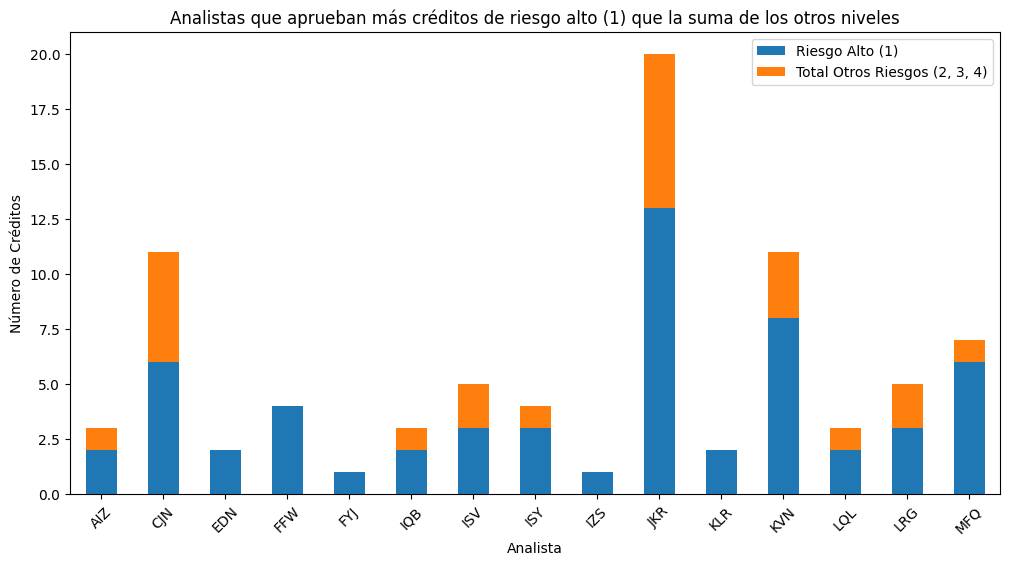

In [ ]:
# Gráfico de los analistas que aprueban más créditos de riesgo alto
plt.figure(figsize=(12,6))
analistas_riesgo_alto[[1, 'Total_Otros_Riesgos']].plot(kind='bar', figsize=(12,6), stacked=True)
plt.xlabel("Analista")
plt.ylabel("Número de Créditos")
plt.title("Analistas que aprueban más créditos de riesgo alto (1) que la suma de los otros niveles")
plt.legend(["Riesgo Alto (1)", "Total Otros Riesgos (2, 3, 4)"])
plt.xticks(rotation=45)
plt.show()


Al tener tantos analistas, agrupamos analistas con tasas de incumplimiento similares 

In [ ]:
# Clasificamos los estados de los créditos
 
 <p align="justify">
  El análisis del riesgo crediticio de cartera ha sido ampliamente estudiado en el contexto de 
la  auditoría  financiera  y la auditoría bancaria. La investigación destaca que la auditoría 
interna  es  importante  en  la  gestión  del  riesgo  crediticio,  permitiendo  a  las  entidades 
financieras mitigar pérdidas y mejorar sus procesos de toma de decisiones (Berisha et al., 
2023). Estos estudios se enfocan en el uso de metodologías cuantitativas, como el análisis 
univariado, para identificar patrones de riesgo dentro de la cartera crediticia. 
Por un lado, Moposita y Ramírez (2016) presentan un marco de auditoría para cooperativas 
de ahorro y crédito, donde se destaca la importancia de realizar exámenes detallados sobre 
el  comportamiento  de  los  clientes.  Este  enfoque  permite  establecer  relaciones  entre 
variables clave como el monto del crédito, la morosidad y la probabilidad de incumplimiento. 
Por otro lado, Hernández Bautista (2023) introduce una herramienta de análisis financiero 
que segmenta clientes según su nivel de riesgo. En este estudio, se resalta que el análisis 
de variables individuales, como el monto del crédito, permite predecir con mayor precisión la 
estabilidad financiera de un cliente, facilitando procesos de auditoría y toma de decisiones 
estratégicas. 

Estos estudios confirman que el análisis univariado es una técnica clave en la identificación 
y  supervisión  del  riesgo  crediticio,  especialmente  en  auditorías  de  microcréditos.  Su 
implementación  permite  a  las  instituciones  financieras  identificar  patrones  en  los  datos 
históricos y mejorar la calidad de su cartera crediticia.
</p>


estado_categoria
bueno            2004
indeterminado     704
malo              208
Name: count, dtype: int64


#### 1.4. Objetivo del taller  
<p align="justify">
    En  este  contexto,  como  equipo  buscamos  aplicar  técnicas  de  análisis  univariado, 
segmentación  de  clientes  según  el  riesgo  y  detección  de  patrones  anómalos  para 
determinar qué factores son más relevantes en la identificación de clientes y agencias con 
alto riesgo financiero, contribuyendo a mejorar la gestión de riesgos en el Banco W. 
Sin embargo, como primer paso, en este taller se hará un análisis univariado teniendo en 
cuenta que ya seguimos los anteriores pasos del análisis exploratorio de datos (EDA, por 
sus siglas en inglés) como lo son la pregunta smart y una vista general de las columnas. 
Nota: en este caso no se cuenta con un diccionario de datos que nos permita determinar el 
significado real de algunas variables del dataset.  
 
Para este punto buscamos establecer qué variables son más útiles y que nos pueden decir 
esta con respecto al análisis que queremos hacer y a la respuesta de nuestra pregunta 
smart, para ello se buscará información externa que nos pueda ayudar y además hacer 
algunos de los procesos que se deben seguir en el análisis univariado como datos faltantes, 
outliers y distribución. 
</p>


#### 1.5 Diccionario de datos

## 2. Análisis Univariado 

#### 2.1 Generalidades de la data a usar

<p align="justify">
    Antes de elegir la variable, presentamos las dos bases de datos principales:
    
- Histórico de Hallazgos: Contiene información sobre auditorías, clientes evaluados,
oficinas y zonas de colocación, tipo de crédito, estado del crédito y clasificación de
hallazgos relacionados con la estabilidad financiera.

- Colocación de Créditos: Proporciona detalles sobre créditos otorgados,
identificaciones de clientes, montos, tasas de interés, plazos y valores de cuota.

El histórico de auditorías desde 2022 a 2024 permite analizar tendencias en los hallazgos
detectados, mientras que la base de colocación de créditos de octubre de 2024 permite
identificar riesgos en la cartera más reciente.

Sin embargo, los datos presentaban:

- Cantidad significativa de valores faltantes, que no se pueden reemplazar fácilmente
dado la cantidad.
- Muchas variables categóricas, en las que se podrían aplicar metodologías como One
Hot encoding.
- Varios ID que no aportan información relevante, aunque se podrían identificar
clientes mayores con cédulas de números más bajos y clientes más jóvenes con
cédulas de número más altos.
</p>






#### Selección de la variable

<p align="justify">
Para abordar el reto desde un análisis univariado, consideramos diversas variables que
podrían aportar a la evaluación del riesgo financiero en microcréditos, entre ellas:

- Tipo de crédito: Diferenciar entre créditos nuevos y renovaciones.
- Estado del crédito: Clasificación según su situación (cancelado, castigado, modificado, etc.).
- Saldo: Monto pendiente de pago, reflejando la deuda real del cliente.
- Monto: Valor total del crédito otorgado.
- Tasa de interés: Indicador del costo financiero y del perfil de riesgo del cliente.
- Plazo del crédito: Duración del préstamo (corto, mediano o largo plazo).
- Ubicación de la oficina: Posible relación entre riesgo y la distancia de las agencias a ciudades capitales.
- Historial de hallazgos en auditorías: Registro de clientes o agencias previamente categorizados como riesgosos.
- Actividad económica del cliente: Sectores con mayor o menor probabilidad de incumplimiento.

Sin embargo, la selección de la variable "Monto" se justifica por los siguientes criterios
clave:
1. El monto es un indicador de exposición financiera: Créditos más grandes implican un
mayor compromiso financiero, aumentando el riesgo de incumplimiento. Estudios
previos han demostrado que los créditos de mayor monto suelen presentar un mayor
riesgo, debido a la mayor carga financiera que representan para los prestatarios.
2. La variable "monto" del crédito es una de las más relevantes en el análisis de riesgo
de cartera crediticia, ya que impacta directamente la probabilidad de incumplimiento
y la estabilidad de la misma (Berisha et al., 2023).
3. Detección de anomalías y fraudes: Valores atípicos en los montos pueden ser
señales de inestabilidad financiera o posibles irregularidades.
4. Respaldo en estudios previos:
Investigaciones como la de Schreiner (2000) han demostrado que el monto del
crédito es un factor determinante en la evaluación del riesgo crediticio.
Moposita y Ramírez (2016) resaltan que el monto del crédito es un indicador clave
en auditorías financieras, ya que permite segmentar a los clientes según su nivel de
exposición al riesgo. Su análisis a través de técnicas univariadas, como histogramas
y boxplots, facilita la identificación de outliers y posibles patrones de incumplimiento.
Por su parte, Hernández Bautista (2023) establece que la evaluación de la variable
"monto" en combinación con otras métricas financieras permite mejorar la
segmentación del riesgo crediticio. En particular, su investigación demuestra que la
relación entre el monto del crédito y el comportamiento de pago de los clientes es un
factor determinante en auditorías de cartera.
5. Viabilidad para análisis avanzados: La Ley de Benford solo puede aplicarse a
variables numéricas que se generan de forma natural, como el monto del crédito,
permitiendo detectar posibles manipulaciones en los datos.
6. Segmentación de clientes según riesgo: La distribución del monto puede revelar
patrones de riesgo y ayudar a identificar clientes con mayor probabilidad de
incumplimiento.
</p>


#### 2.2.1. Selección de la variable monto desde un punto de vista cuantitativo

In [ ]:
#Agregadar matriz de correlación de matiu

## 3. Análisis univariado en python

In [ ]:
#Agregar análisis de jonathan

## 4. Interpretación de resultados y hallazgos relevantes

<p align="justify">
A partir de las métricas, gráficos y análisis realizados sobre la variable monto, podemos
resaltar los siguientes hallazgos:

- En primer lugar, notamos un rango muy amplio de monto de créditos, dado que, estos van desde $400.000 hasta $130.000.000. Lo anterior nos demuestra que la cartera de microcréditos cuenta con una variedad de perfiles de clientes amplia.
- La media de los montos ($7,931,928) es significativamente mayor que la mediana ($3,736,415), lo que sugiere la presencia de valores extremos u outliers, es decir, la presencia de créditos de muy alto monto los cuales mueven el promedio.
- El monto más solicitado (moda) es de $400,000, solicitado un total de 123 ocasiones, lo que indica que la mayoría de los créditos son pequeños.
- Al aplicar una transformación logarítmica a la variable monto, observamos que los datos tienden a comportarse como una campana de gauss. Esto es un
comportamiento común en distribuciones muy sesgadas.
- Revisando las métricas de dispersión, notamos la presencia de una alta dispersión en los montos otorgados. La alta desviación estándar ($12,339,723) y el coeficiente de variación (155.6%) indican que los montos de los microcréditos son muy variables o muy distintos. Esto nos indica que los créditos y montos aprobados dependen de diversos factores y criterios del banco.
- La asimetría de los datos (3.9) nos indica que la distribución tiene un sesgo positivo fuerte. Lo que sugiere que la distribución de los montos presenta una cola larga hacia la derecha (montos altos poco frecuentes pero muy grandes). La curtosis (20.7) nos indica lo mismo, la presencia de un pico de datos pronunciado y de valores extremos.
- Al revisar los percentiles de la data, observamos que el 75% de los créditos son menores a $7,254,207 y solo el 10% de los créditos superan los $19,691,704. Esto
muestra que la mayoría de los créditos están en rangos relativamente bajos, mientras que hay algunos montos elevados que pueden representar riesgos
mayores.
- Al desarrollar el análisis de valores outliers, notamos que más del 13% de los microcréditos están por encima del límite de outliers. Estos montos atípicos podrían estar asociados a un mayor riesgo de fraude, deficiencias en la asignación del crédito o condiciones especiales que justifican montos más altos. Es importante analizar si estos créditos presentan más hallazgos de auditoría en comparación con
los montos más bajos.
- Al analizar los valores de monto más frecuentes, encontramos que los microcréditos más comunes están en un rango por debajo de $2,000,000.
- Por último, podemos apreciar que al dividir la data entre observaciones por debajo del umbral de valores outliers y por encima de este umbral, la forma y distribución para cada conjunto de datos es muy similar, con un sesgo pronunciado hacia la derecha, lo cual evidencia que la mayoría de los créditos son de bajo monto.

</p>

## Conclusiones del anális

A manera de conclusión, el análisis univariado sobre la variable monto nos brindó los siguientes hallazgos claves con respecto a la data y el contexto a trabajar:

- Alta dispersión y presencia de valores extremos en los montos de crédito:
La variable monto presenta un sesgo positivo y una alta dispersión, dado que, los
créditos de alto monto son pocos. Este aspecto se debe tener en cuenta a la hora de
analizar el riesgo de la cartera de microcréditos. Si se llegase a identificar qué
créditos de alto monto son propensos a presentar mayor riesgo, esta variable sería
de mucho interés para cualquier modelo y/o análisis inferencial.
- Identificación de un 13% de créditos como outliers y su posible relación con
fraude:
Notamos una alta cantidad de outliers bajo el criterio del 1.5*IQR. Cerca del 13% de
los montos se podrían considerar outliers. Esta población de altos montos, pueden
ser interesantes para mayores y más profundos análisis de riesgos. Se pueden
desarrollar reglas diferenciadas para evaluar y modelar riesgos en montos bajos y
altos.
- Concentración de créditos en montos bajos y necesidad de analizar otros
factores de riesgo:
La mayoría de los créditos están en rangos bajos, los créditos más comunes rondan
entre los $400.000 y $1,500,000. Si dentro de este segmento se encuentran
diferentes niveles de riesgo, esto sugiere que existen otras condiciones y factores
del crédito que influyen en la probabilidad de incumplimiento, más allá del monto
otorgado.

En cuanto a próximos pasos, es de mucho valor desarrollar análisis exploratorios más
profundos a la base de datos de hallazgos. En primer lugar, es importante realizar análisis
univariados para las demás variables del conjunto de datos proporcionado. A continuación,
podemos ganar mucho conocimiento llevando a cabo análisis bivariados y multivariados
entre la variable monto, el riesgo y las otras variables de interés para el contexto.

Podemos hallar métricas claves de la variable monto, como percentiles, medidas de
tendencia y dispersión, agrupado por otras variables categóricas como las oficinas, zonas,
analistas, riesgo del crédito, categoría de los hallazgos, año y actividad económica. Para
cada relación, podemos desarrollar diagramas de tipo boxplots, los cuales nos ayudan a
identificar patrones o sesgos en las observaciones. Con lo anterior, podemos recopilar
mayores insights del contexto de los datos y generar preguntas o hipótesis que nos guíen
en el desarrollo de las soluciones.

Adicionalmente, en el análisis bibliográfico hemos identificado que existen metodologías y
reglas matemáticas que se le pueden aplicar a los montos de créditos para obtener mayor
información sobre posibles actividades fraudulentas, tal es el caso de la regla llamada “Ley
de Benford”. Como siguiente paso, podríamos emplear la Ley de Benford sobre el dato de
monto para crear nuevas variables para un posible modelo de IA, o para realizar análisis
descriptivos más rigurosos con respecto al perfil de riesgo de los créditos.